# Crate & Barrel Project
-----------------------

In [1]:
# Import Zone --Alphabetical Order--
from google.colab import files
import pandas as pds
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

## Load and Tweak Datasets

### Load Datasets

For those who use this, you must upload your on kaggle.json and must be participating in the ***Otto Group Product Classification Challenge*** in order to retrive Training and Testing CSV's.

In [2]:
# Must upload kaggle.json to retrieve data
files.upload()

# Removes .kaggle directory if already present
!rm -r ~/.kaggle
# Make .kaggle directory
!mkdir ~/.kaggle
# Move Uploaded kaggle.json to .kaggle directory
!mv ./kaggle.json ~/.kaggle/
# Allows Directory to be Viewable for kaggle command
!chmod 600 ~/.kaggle/kaggle.json

# Download Kaggle Otto Competition Files
!kaggle competitions download -c otto-group-product-classification-challenge
# Unzip Otto Competition Files
!unzip otto-group-product-classification-challenge.zip

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 99% 6.00M/6.05M [00:00<00:00, 61.6MB/s]
100% 6.05M/6.05M [00:00<00:00, 60.7MB/s]
Archive:  otto-group-product-classification-challenge.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [3]:
# Load Training Data
Otto = pds.read_csv('train.csv', index_col='id')

# View Training Data
Otto

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9


In [4]:
# Load Testing Data
Otto_RealTest = pds.read_csv('test.csv', index_col='id')

# View Testing Data
Otto_RealTest

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144364,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
144365,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144366,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0


### Tweak Datasets
Since Testing Dataset has no labels, it doesn't need to be split.

In [5]:
# Put Training Column Names into a list
ColumnNames = Otto.columns.values.tolist()
ColumnNames[:10]

['feat_1',
 'feat_2',
 'feat_3',
 'feat_4',
 'feat_5',
 'feat_6',
 'feat_7',
 'feat_8',
 'feat_9',
 'feat_10']

In [6]:
# Split Training Data in Features and Labels
Otto_Labels = Otto['target']
Otto_Features = Otto[ColumnNames[:93]]
Otto_Features

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61875,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61876,0,0,0,0,0,0,0,3,1,0,...,0,0,3,1,0,0,0,0,0,0


Modifying Otto_Labels so that it can be read from integers 0 to 8 instead of objects

In [7]:
# View Unique Label Names
Labels = Otto_Labels.unique()
Labels

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [8]:
lab = LabelEncoder()
Otto_Labels = lab.fit_transform(Otto_Labels)
Otto_Labels

array([0, 0, 0, ..., 8, 8, 8])

Since Testing Dataframe doesn't include labels for checking. Splitting the Training Dataframe for training and testing would help determine accuracy of trained classifier(s).

In [9]:
# Split Training Data into Training and Test Data
Otto_Train_Features, Otto_Test_Features, Otto_Train_Labels, Otto_Test_Labels = train_test_split(Otto_Features, Otto_Labels, train_size=0.6, random_state=42)

## Classifiers

### Training and Testing Classifier

1. Used KNN with RandomSearchCV to check how the tweaked training csv would do on a classifier.
2. Using XGBoost with RandomSearchCV for most accurate final product

#### K Nearest Neighbors

In [10]:
neigh = []
for i in range(299):
  neigh.append(i+2)

In [11]:
print(f"From {neigh[0]} to {neigh[298]} Neighbors")

From 2 to 300 Neighbors


In [12]:
# K Nearest Neighbor
# Range of Hyper Paramters
hyperparam_grid = [
    {'n_neighbors': neigh}
]

In [13]:
# Create
knn = KNeighborsClassifier()
knn_rs = RandomizedSearchCV(knn, param_distributions=hyperparam_grid, n_jobs=-1)

In [14]:
# Fit
%%time
knn_rs.fit(Otto_Train_Features, Otto_Train_Labels)

CPU times: user 1.2 s, sys: 241 ms, total: 1.44 s
Wall time: 3min 42s


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, ...]}])

In [15]:
# Best Param
cheese = knn_rs.best_params_
cheese

{'n_neighbors': 8}

In [16]:
# Prediction and Accuracy
pred=knn_rs.best_estimator_.predict(Otto_Test_Features)
accuracy_score(Otto_Test_Labels, pred)

0.7769877181641888

#### XGBoost

In [64]:
bird = []
for i in range(51):
  bird.append(i*0.01)

In [65]:
horse = []
for i in range(8):
  horse.append((i*0.1) + 0.3)

In [66]:
wolf = []
for i in range(1001):
  wolf.append(i)

In [67]:
print(f"From {wolf[0]} to {wolf[1000]} Estimators, From {bird[0]} to {bird[50]} learning rate and gamma, From {horse[0]} to {horse[7]} subsample and colsample_by_level,")

From 0 to 1000 Estimators, From 0.0 to 0.5 learning rate and gamma, From 0.3 to 1.0 subsample and colsample_by_level,


In [68]:
# XGBoost
# Range of Hyper Paramters
hyperparam_grid = [
    {'n_estimators': wolf,
     'eta': bird,
     'subsample': horse,
     'colsample_bylevel': horse,
     'gamma': bird,
     'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
     }
]

In [69]:
# Create Part 1
xgb = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor='gpu_predictor', random_state=None, ...)

In [70]:
# Create Part 2
param_comb = 6
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
xgb_rs = RandomizedSearchCV(xgb, param_distributions=hyperparam_grid, n_iter=param_comb,  n_jobs=-1, cv=skf.split(Otto_Train_Features,Otto_Train_Labels), verbose=3)

In [71]:
# Fit
%%time
xgb_rs.fit(Otto_Train_Features,Otto_Train_Labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 33.5 s, sys: 575 ms, total: 34.1 s
Wall time: 8min 8s


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fa308402740>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type...
                                                   0.05, 0.06, 0.07, 0.08, 0.09,
                                                   0.1, 0.11, 0.12, 0.13, 0.14,
                                                   0.15, 0.16, 0.17, 0.18, 0.19,
                                                   0.2, 0.21, 0.22, 0.23, 0.24,
                                                   0.25, 0.26, 0.27, 0.28, 0.29, ...],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                                         'n_estimators': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13, 14, 15, 16, 17,
                                                          18, 19, 20, 21, 22,
                                                          23, 24, 25, 26, 27,
                                                          28, 29, ...],
                                         'subsample': [0.3, 0.4, 0.5,
                                                       0.6000000000000001, 0.7,
                                                       0.8, 0.9000000000000001,
                                                       1.0]}],
                   verbose=3)

In [72]:
# Best Param
toast = xgb_rs.best_params_
toast

{'subsample': 0.3,
 'n_estimators': 697,
 'max_depth': 10,
 'gamma': 0.17,
 'eta': 0.03,
 'colsample_bylevel': 0.7}

In [73]:
# Prediction and Accuracy
pred=xgb_rs.best_estimator_.predict(Otto_Test_Features)
accuracy_score(Otto_Test_Labels, pred)

0.8233274078862314

In [77]:
TheChosenOne = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', 
                          subsample=toast['subsample'], n_estimators=toast['n_estimators'],
                          max_depth=toast['max_depth'], gamma=toast['gamma'], 
                          eta=toast['eta'], colsample_bylevel=toast['colsample_bylevel'])
TheChosenOne

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03, eval_metric=None,
              feature_types=None, gamma=0.17, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=697, n_jobs=None,
              num_parallel_tree=None, predictor='gpu_predictor', ...)

In [78]:
TheChosenOne.fit(Otto_Train_Features, Otto_Train_Labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03, eval_metric=None,
              feature_types=None, gamma=0.17, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=697, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [79]:
pred=TheChosenOne.predict(Otto_Test_Features)
accuracy_score(Otto_Test_Labels, pred)

0.8233274078862314

### REAL TEST CLASSIFIER

In [83]:
# Predict Label Probablity For Each Row
placeholder = TheChosenOne.predict_proba(Otto_RealTest)

In [84]:
# View First Row of predicted probablities
placeholder[0]

array([5.8604288e-04, 1.3362995e-01, 2.6129335e-01, 6.0191453e-01,
       9.7462027e-05, 2.0941926e-04, 1.9229775e-03, 2.3562126e-04,
       1.1069686e-04], dtype=float32)

In [85]:
# Create New Dataframe
finale = pds.DataFrame(data=placeholder, index=Otto_RealTest.index, columns=Labels)
finale

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.000586,0.133630,0.261293,0.601915,0.000097,0.000209,0.001923,0.000236,0.000111
2,0.003763,0.016943,0.003300,0.002442,0.000387,0.398494,0.006417,0.564615,0.003640
3,0.000019,0.000021,0.000030,0.000011,0.000005,0.999473,0.000028,0.000377,0.000035
4,0.000936,0.542226,0.431557,0.016147,0.000122,0.000217,0.000534,0.000465,0.007798
5,0.092810,0.000686,0.000290,0.000119,0.000143,0.004983,0.001696,0.139371,0.759902
...,...,...,...,...,...,...,...,...,...
144364,0.300483,0.045650,0.021484,0.033938,0.000629,0.460130,0.058725,0.038148,0.040814
144365,0.001150,0.299986,0.570269,0.087069,0.000346,0.000859,0.039795,0.000251,0.000274
144366,0.001066,0.669080,0.252436,0.068834,0.000271,0.001083,0.005851,0.000785,0.000594


In [86]:
# Turn into a csv 
finale.to_csv('OttoSubmit.csv')
files.download('OttoSubmit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Final Submission Result

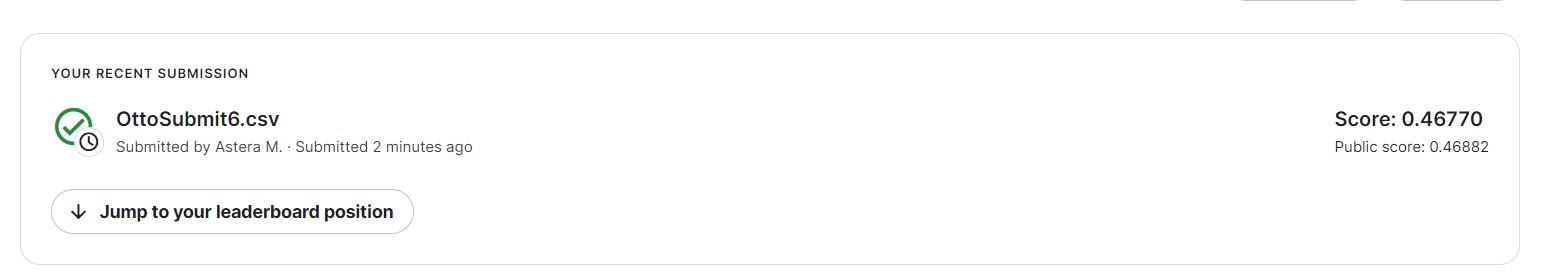